# Text Similarity

## Jaccard Similarity

Implement the Jaccard similarity function. The function should take two strings and return the Jaccard similarity between the two strings. The Jaccard similarity is defined as the size of the intersection divided by the size of the union of the two sets of tokens.

In [2]:
def jaccard_similarity(str1: str, str2: str) -> float:
    """
    Compute the Jaccard similarity between two strings.
    
    Parameters
    ----------
    str1: str
        The first string.
    str2: str
        The second string.

    Returns
    -------
    float
        The Jaccard similarity between the two strings.
    """
    str1 = set(str1.split())
    str2 = set(str2.split())
    return len(str1.intersection(str2)) / len(str1.union(str2))

Test the function with the following strings:

In [4]:
str1 = "I love applied data science"
str2 = "I love data mining"
str3 = "I hate applied data science"
str4 = "This class is awesome"

<Axes: >

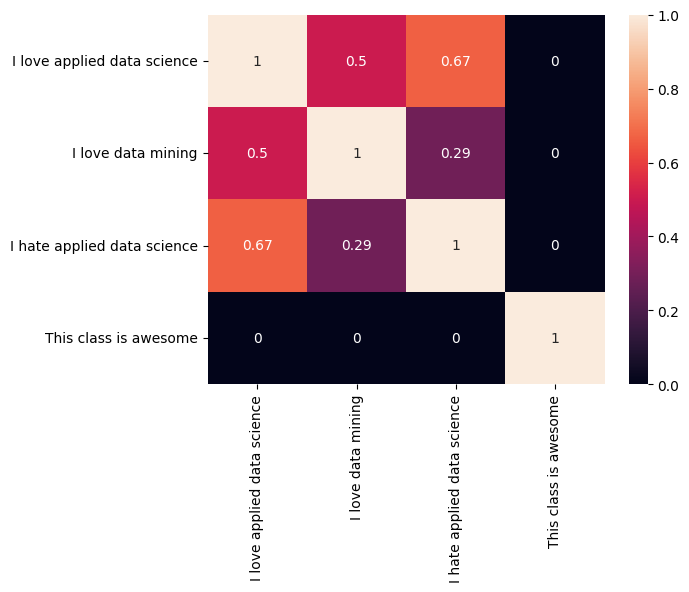

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np

# heat map of jaccard similarities
data = np.array([[jaccard_similarity(str1, str1), jaccard_similarity(str1, str2), jaccard_similarity(str1, str3), jaccard_similarity(str1, str4)],
                    [jaccard_similarity(str2, str1), jaccard_similarity(str2, str2), jaccard_similarity(str2, str3), jaccard_similarity(str2, str4)],
                    [jaccard_similarity(str3, str1), jaccard_similarity(str3, str2), jaccard_similarity(str3, str3), jaccard_similarity(str3, str4)],
                    [jaccard_similarity(str4, str1), jaccard_similarity(str4, str2), jaccard_similarity(str4, str3), jaccard_similarity(str4, str4)]])
df = pd.DataFrame(data, columns=[str1, str2, str3, str4], index=[str1, str2, str3, str4])
sns.heatmap(df, annot=True)

## Cosine Similarity

Implement the cosine similarity function. The function should take two strings and return the cosine similarity between the two strings. The cosine similarity is defined as the dot product of the two vectors divided by the product of the magnitudes of the two vectors.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def cosine_similarity(str1: str, str2: str) -> float:
    """
    Compute the cosine similarity between two strings.
    
    Parameters
    ----------
    str1: str
        The first string.
    str2: str
        The second string.

    Returns
    -------
    float
        The cosine similarity between the two strings.
    """
    # calculate the count of each word in the two strings
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([str1, str2])
    vec1 = X.toarray()[0]
    vec2 = X.toarray()[1]
    print(vec1)
    print(vec2)
    print(vectorizer.get_feature_names_out())
    
    # calculate the norm of the two vectors
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    # calculate the cosine similarity by computing the dot product of the two vectors and dividing by the product of the norms
    return np.dot(vec1, vec2) / (norm1 * norm2)

In [22]:
# Test with the first two strings
cosine_similarity(str1, str2)

[1 1 1 0 1]
[0 1 1 1 0]
['applied' 'data' 'love' 'mining' 'science']


np.float64(0.5773502691896258)

[1 1 1 1]
[1 1 1 1]
['applied' 'data' 'love' 'science']
[1 1 1 0 1]
[0 1 1 1 0]
['applied' 'data' 'love' 'mining' 'science']
[1 1 0 1 1]
[1 1 1 0 1]
['applied' 'data' 'hate' 'love' 'science']
[1 0 0 1 0 1 1 0]
[0 1 1 0 1 0 0 1]
['applied' 'awesome' 'class' 'data' 'is' 'love' 'science' 'this']
[0 1 1 1 0]
[1 1 1 0 1]
['applied' 'data' 'love' 'mining' 'science']
[1 1 1]
[1 1 1]
['data' 'love' 'mining']
[0 1 0 1 1 0]
[1 1 1 0 0 1]
['applied' 'data' 'hate' 'love' 'mining' 'science']
[0 0 1 0 1 1 0]
[1 1 0 1 0 0 1]
['awesome' 'class' 'data' 'is' 'love' 'mining' 'this']
[1 1 1 0 1]
[1 1 0 1 1]
['applied' 'data' 'hate' 'love' 'science']
[1 1 1 0 0 1]
[0 1 0 1 1 0]
['applied' 'data' 'hate' 'love' 'mining' 'science']
[1 1 1 1]
[1 1 1 1]
['applied' 'data' 'hate' 'science']
[1 0 0 1 1 0 1 0]
[0 1 1 0 0 1 0 1]
['applied' 'awesome' 'class' 'data' 'hate' 'is' 'science' 'this']
[0 1 1 0 1 0 0 1]
[1 0 0 1 0 1 1 0]
['applied' 'awesome' 'class' 'data' 'is' 'love' 'science' 'this']
[1 1 0 1 0 0 1]
[0 0 1

<Axes: >

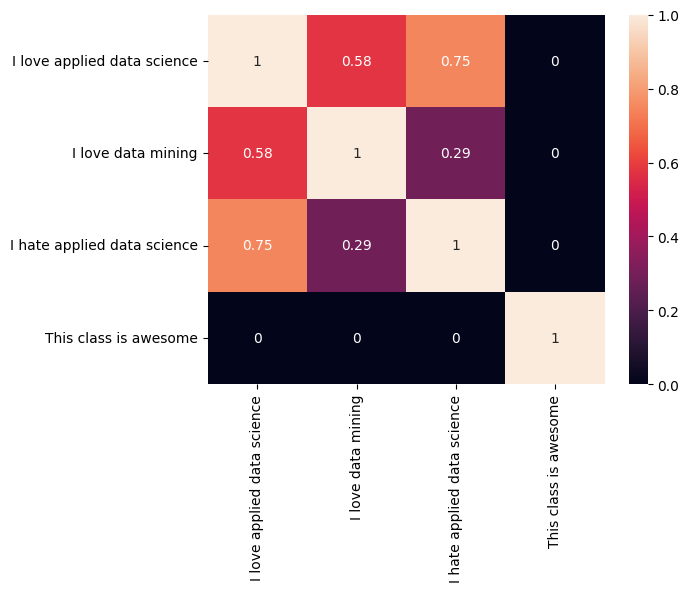

In [23]:
# heat map of cosine similarities

data = np.array([[cosine_similarity(str1, str1), cosine_similarity(str1, str2), cosine_similarity(str1, str3), cosine_similarity(str1, str4)],
                    [cosine_similarity(str2, str1), cosine_similarity(str2, str2), cosine_similarity(str2, str3), cosine_similarity(str2, str4)],
                    [cosine_similarity(str3, str1), cosine_similarity(str3, str2), cosine_similarity(str3, str3), cosine_similarity(str3, str4)],
                    [cosine_similarity(str4, str1), cosine_similarity(str4, str2), cosine_similarity(str4, str3), cosine_similarity(str4, str4)]])
df = pd.DataFrame(data, columns=[str1, str2, str3, str4], index=[str1, str2, str3, str4])
sns.heatmap(df, annot=True)